In [4]:
import imageio
import PIL
from PIL import Image
import numpy as np
import scipy as sp
from scipy import linalg
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [5]:
# Load the file into a np array
#mona_lisa = imageio.imread('mona_lisa.png')

# Display image from file
#Image(filename='mona_lisa.png')

# Display image from numpy array
#imgplot = plt.imshow(mona_lisa[:,:,3])

#
img = PIL.Image.open('mona_lisa.png')


In [6]:
imgmat = img.convert('LA')

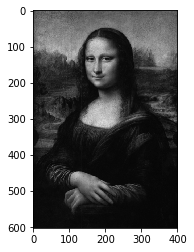

In [7]:
plt.imshow(imgmat)

In [23]:
# Call each matrix grayscale 1, grayscale 2, etc so we work in 2D
gs_0 = mona_lisa[:,:,0]
gs_1 = mona_lisa[:,:,1]
gs_2 = mona_lisa[:,:,2]
gs_3 = mona_lisa[:,:,3]

In [5]:
# Perform SVD
#U, s, V = np.linalg.svd(gs_0)
#D = linalg.diagsvd(s, gs_0.shape[0], gs_0.shape[1])

In [6]:
# Check shapes and sizes
#print(U.shape)
#print(V.shape)
#print(s.shape)
#print(D.shape)

In [24]:
def lowRankApproximate(rank, D):
    maximum = []
    indices = []
    D_copy = D.copy()
    for max_val in range(rank):
        
        # Find max value in D
        ind = np.unravel_index(np.argmax(D_copy, axis=None), D.shape)
        
        # Add it to our max list
        maximum.append(D_copy[ind])
        indices.append(ind)
        
        # Set it to zero to find next max
        D_copy[ind] = 0
    
    # Rebuilt low rank approximation
    D_approx = np.zeros((D.shape))
    for i in range(len(maximum)):
        D_approx[indices[i]] = maximum[i]

    return D_approx


    
def buildCompressed(rank, greyscale):
    gs_copy = greyscale.copy()
    U, s, V = np.linalg.svd(gs_copy, full_matrices=True)
    D = linalg.diagsvd(s, gs_copy.shape[0], gs_copy.shape[1])
    D_approx = lowRankApproximate(rank, D)
    M = np.dot(np.dot(U, D_approx), V)
    M[M < 0] = 0
    M[M > 1] = 1
    return (M)

In [46]:
############################
# copy
###########################

def lowRankApproximatecopy(rank, D):
    maximum = []
    indices = []
    D_copy = D.copy()
    for max_val in range(rank):
        
        # Find max value in D
        ind = np.unravel_index(np.argmax(D_copy, axis=None), D.shape)
        
        # Add it to our max list
        maximum.append(D_copy[ind])
        indices.append(ind)
        
        # Set it to zero to find next max
        D_copy[ind] = 0
    
    # Rebuilt low rank approximation
    D_approx = np.zeros((rank, rank))
    for i in range(len(maximum)):
        D_approx[i,i] = maximum[i]

    return D_approx, indices

    
def buildCompressedcopy(rank, greyscale):
    gs_copy = greyscale.copy()
    U, s, V = np.linalg.svd(gs_copy, full_matrices=True)
    D = linalg.diagsvd(s, gs_copy.shape[0], gs_copy.shape[1])
    D_approx, indices = lowRankApproximatecopy(rank, D)
    
    # Make U, V
    U_approx = np.zeros((gs_copy.shape[0], rank))
    for i in range(rank):
        U_approx[:,i] = U[:,indices[i][1]]
    
    V_approx = np.zeros((rank, gs_copy.shape[1]))
    for i in range(rank):
        V_approx[i, :] = V[indices[i][0], :]
        
    M = np.dot(np.dot(U_approx,D_approx), V_approx)
    M[M < 0] = 0
    M[M > 1] = 1
    return (M)

In [47]:
greyscales = [gs_0, gs_1, gs_2, gs_3]
ranks = [2, 5, 10]
mona_lisas = []

for rank in ranks:
    compressed = np.empty((gs_0.shape[0],gs_0.shape[1]), float)
    for layer in greyscales:
        compressed = np.dstack((compressed, buildCompressedcopy(rank, layer)))
        
    mona_lisas.append(compressed)